# Import Libraies

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import numpy as np
import helperfunc


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Read Data

In [42]:
# Load the data
df = pd.read_csv("newtrain.csv")
X = df.drop(columns=['label'])
y = df['label']
label_counts = df['label'].value_counts()
label_counts
len(df.columns)
df.columns

Index(['0.81_84.0447m/z', '10.31_588.3552m/z', '6.25_1040.0961m/z',
       '8.65_211.1376m/z', '7.90_106.0866m/z', '7.00_764.7517m/z',
       '11.67_513.3221m/z', '1.25_242.0901n', '7.86_551.2283m/z',
       '8.42_140.1064m/z',
       ...
       '0.81_106.0632n', '10.79_146.1171m/z', '10.87_113.0592n',
       '10.89_352.2131n', '11.75_138.1272m/z', '12.45_304.2933m/z',
       '8.67_406.1820n', '4.66_652.2103m/z', '10.15_572.8379m/z', 'label'],
      dtype='object', length=101)

In [2]:
# Load the data
df = pd.read_csv("all_data_metabolomics.csv")
df = df.drop(columns=['sample'])
X = df.drop(columns=['label'])
y = df['label']
label_counts = df['label'].value_counts()
label_counts
len(df.columns)
df.columns

Index(['0.80_293.0987m/z', '0.81_84.0447m/z', '0.81_106.0632n',
       '0.81_130.0507m/z', '0.81_208.0638m/z', '0.81_258.0761n',
       '0.81_305.0857m/z', '0.82_106.0864m/z', '0.82_148.0738n',
       '0.82_161.0814m/z',
       ...
       '19.30_337.1045m/z', '19.40_185.0427m/z', '19.41_210.0607m/z',
       '19.44_143.0327m/z', '19.44_161.0239m/z', '19.44_943.9903m/z',
       '19.45_229.0504m/z', '19.46_203.0525m/z', '19.50_342.1161n', 'label'],
      dtype='object', length=3319)

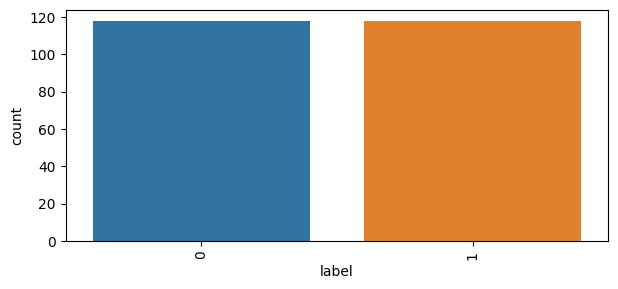

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))
g = sns.countplot(data=df, x='label')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better visibility
plt.show()

In [72]:
X = filtered_data.drop(columns=['Sample.Name','label'])
y = filtered_data['label']

convert label

# Plot Features

Feature ranking:
1. feature no:1 feature name:0.81_84.0447m/z (0.065524)
2. feature no:2277 feature name:10.31_588.3552m/z (0.042562)
3. feature no:1129 feature name:8.65_211.1376m/z (0.035668)
4. feature no:2719 feature name:11.67_513.3221m/z (0.026817)
5. feature no:80 feature name:1.33_146.0794m/z (0.024857)
6. feature no:2563 feature name:10.79_146.1171m/z (0.023898)
7. feature no:1021 feature name:7.86_551.2283m/z (0.022542)
8. feature no:2592 feature name:10.92_141.0911m/z (0.021276)
9. feature no:1090 feature name:8.42_291.0874m/z (0.018917)
10. feature no:1089 feature name:8.42_140.1064m/z (0.018869)
11. feature no:81 feature name:1.34_199.1053m/z (0.018679)
12. feature no:617 feature name:6.10_878.8183m/z (0.018514)
13. feature no:63 feature name:1.25_242.0901n (0.018471)
14. feature no:1032 feature name:7.90_106.0866m/z (0.018188)
15. feature no:178 feature name:2.07_166.0536m/z (0.016625)
16. feature no:2654 feature name:11.28_435.2166m/z (0.016496)
17. feature no:2573 featu

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


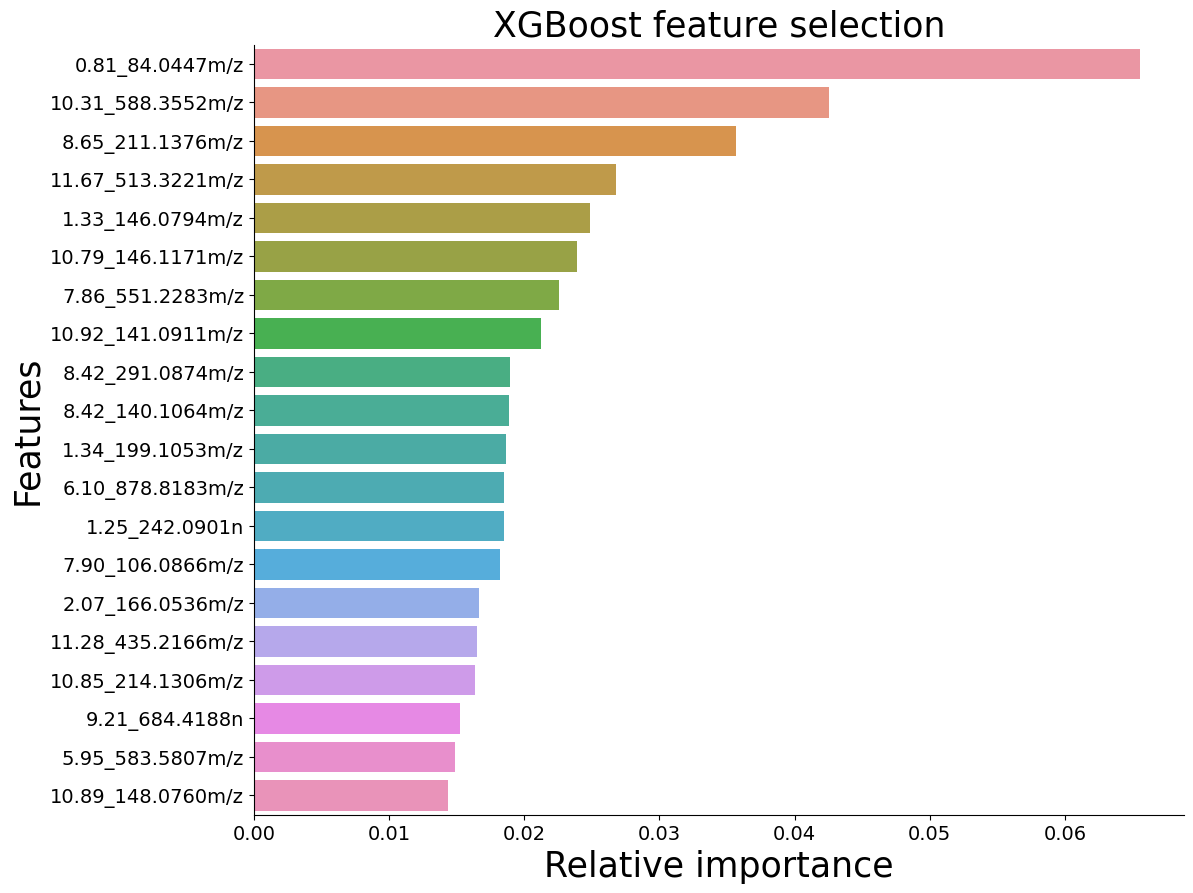

-----------------------------------------------------------------
Feature ranking:
1. feature no:3 feature name:0.81_130.0507m/z (0.034797)
2. feature no:1 feature name:0.81_84.0447m/z (0.028605)
3. feature no:0 feature name:0.80_293.0987m/z (0.019566)
4. feature no:2563 feature name:10.79_146.1171m/z (0.015503)
5. feature no:2577 feature name:10.87_249.1085m/z (0.015373)
6. feature no:136 feature name:1.78_107.0703m/z (0.012339)
7. feature no:178 feature name:2.07_166.0536m/z (0.011075)
8. feature no:137 feature name:1.78_133.0864m/z (0.011065)
9. feature no:1016 feature name:7.82_183.0575m/z (0.011003)
10. feature no:2709 feature name:11.63_270.1929m/z (0.010493)
11. feature no:2606 feature name:10.96_118.1230m/z (0.010328)
12. feature no:98 feature name:1.55_154.0744n (0.009983)
13. feature no:2574 feature name:10.85_270.1569m/z (0.009684)
14. feature no:2605 feature name:10.96_100.1124m/z (0.009325)
15. feature no:246 feature name:2.83_210.0989n (0.009004)
16. feature no:1345 featu

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


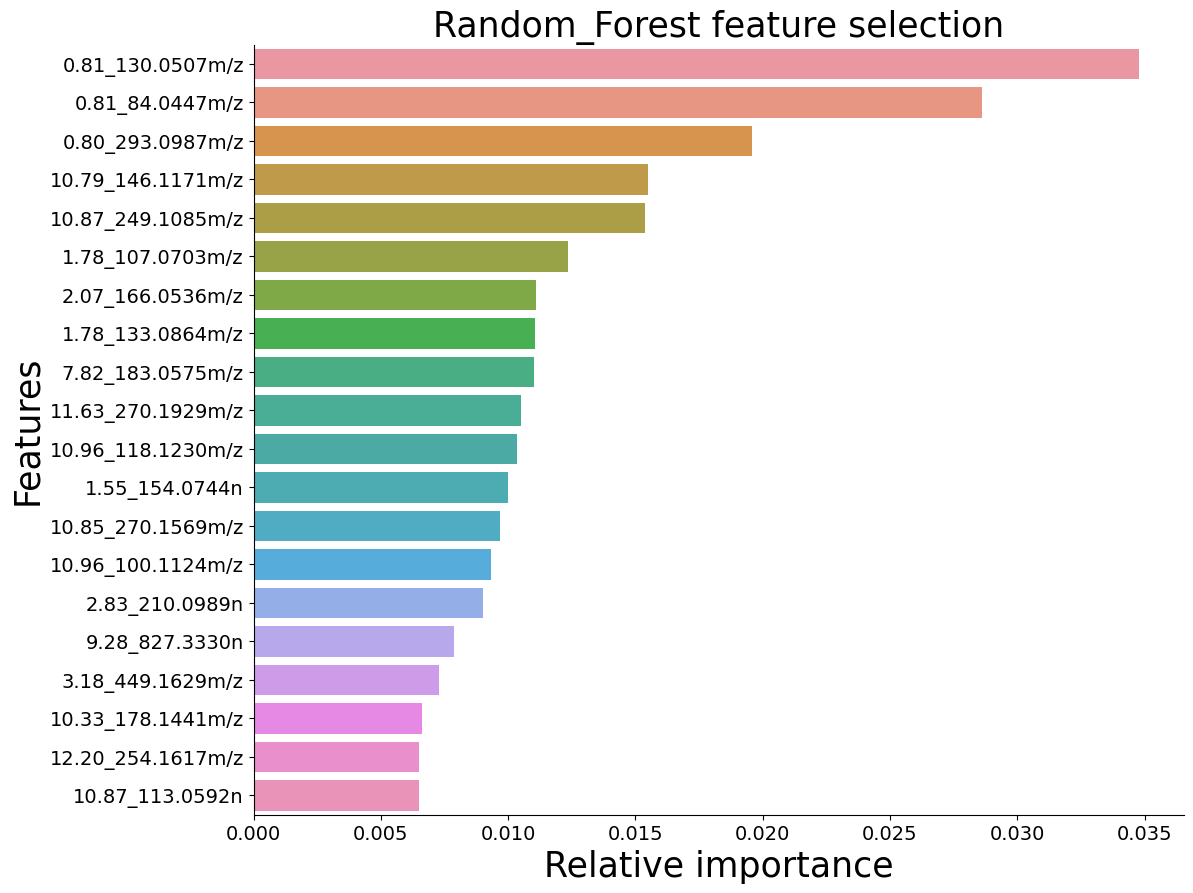

-----------------------------------------------------------------
Feature ranking:
1. feature no:3 feature name:0.81_130.0507m/z (0.027792)
2. feature no:1 feature name:0.81_84.0447m/z (0.018485)
3. feature no:3280 feature name:16.11_837.5905m/z (0.012444)
4. feature no:238 feature name:2.75_168.0880n (0.011132)
5. feature no:98 feature name:1.55_154.0744n (0.009651)
6. feature no:2709 feature name:11.63_270.1929m/z (0.008781)
7. feature no:248 feature name:2.84_449.1630m/z (0.008474)
8. feature no:0 feature name:0.80_293.0987m/z (0.008154)
9. feature no:339 feature name:4.06_449.1629m/z (0.007430)
10. feature no:1348 feature name:9.28_956.3750n (0.007112)
11. feature no:225 feature name:2.56_449.1631m/z (0.006263)
12. feature no:40 feature name:1.09_315.0805m/z (0.006186)
13. feature no:2563 feature name:10.79_146.1171m/z (0.006134)
14. feature no:1112 feature name:8.50_211.1428m/z (0.005922)
15. feature no:138 feature name:1.78_150.0899n (0.005634)
16. feature no:246 feature name:2.8

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


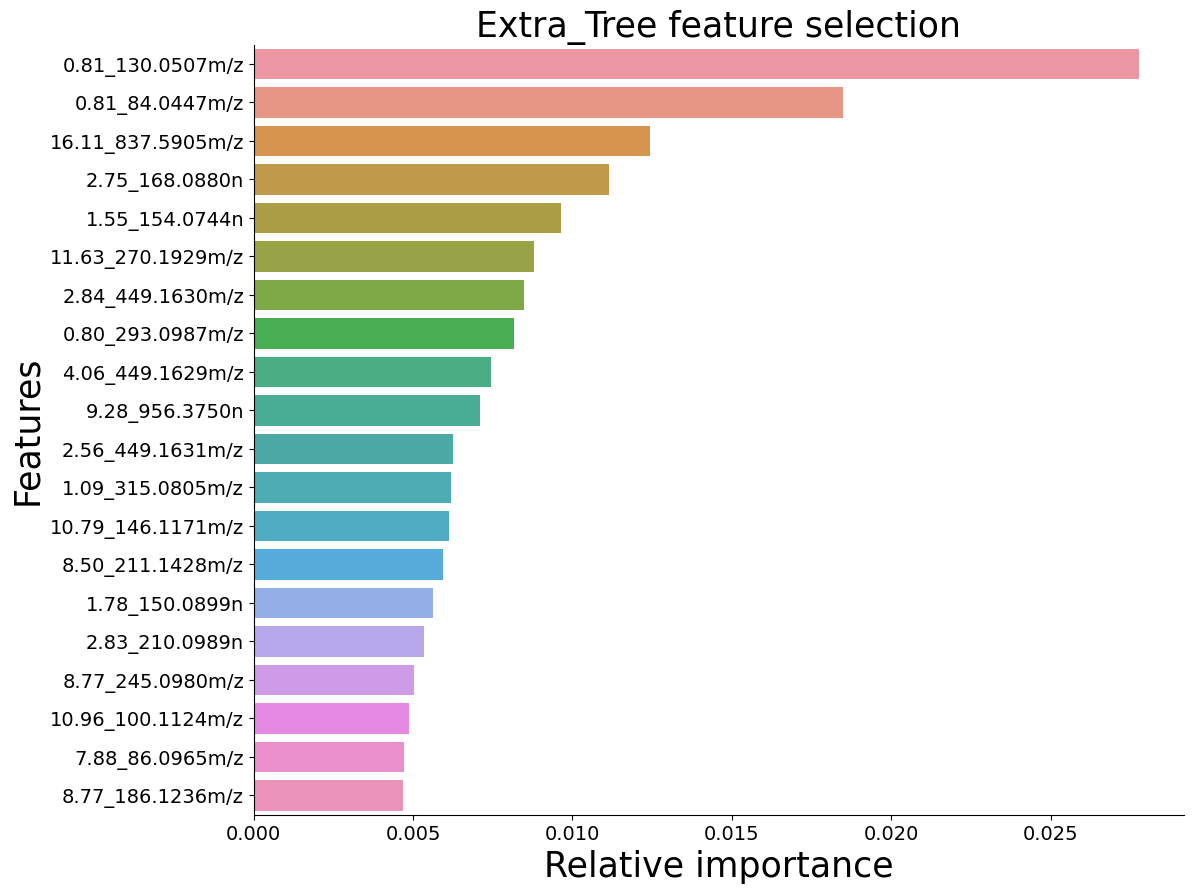

-----------------------------------------------------------------


In [3]:
xgboost,randomforest,extratree = helperfunc.feature_selection_without_gen(X, y)

In [4]:
# xgboost[:100]

In [24]:
# randomforest

In [2]:
feature_selection_model = xgboost

fold_data = helperfunc.cv_foldcsv(n_splits=5, shuffle=False,feature_selection_model=feature_selection_model)
fold_data

In [3]:
feature_num= 20
#feature_num= len(filtered_xgboost)
feature_selection_model= xgboost
#feature_selection_model= filtered_xgboost   ##choose any of them [xgboost,randomforest,extratree, genetic_feature_selection]
classifier='all' ## choose 'all' for all models

#Classification with top features increasing by 1 by 1
Result, prb1,prb0,ytest,tar,pred,confusion_matrices =helperfunc.classification_with_combined_features(fold_data,feature_num,feature_selection_model,classifier)


In [6]:
Result

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
MLPClassifier,91.25,91.28,91.25,91.32,91.25,0.956035
LinearDiscriminantAnalysis,95.00,95.21,95.00,95.26,95.00,0.991583
XGBClassifier,90.00,90.03,90.00,89.83,89.99,0.937878
RandomForestClassifier,95.00,95.01,95.00,95.05,95.00,0.974643
LogisticRegression,96.25,96.52,96.25,96.55,96.25,0.994226
SVM,93.33,93.66,93.33,93.66,93.33,0.979130
ExtraTreesClassifier,93.75,93.75,93.75,93.76,93.74,0.979200
AdaBoostClassifier,93.33,93.46,93.33,93.52,93.33,0.978296
KNeighborsClassifier,92.92,92.92,92.91,92.86,92.91,0.939861
GradientBoostingClassifier,88.33,88.35,88.34,88.36,88.34,0.945878


In [ ]:
Results.to

In [7]:

top_3_accuracy_models = Result.nlargest(4, 'Accuracy')
top_3_accuracy_models

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
LogisticRegression,96.25,96.52,96.25,96.55,96.25,0.994226
LogisticRegression_untuned,96.25,96.52,96.25,96.55,96.25,0.994435
ElasticNet_untuned,96.25,96.52,96.25,96.55,96.25,0.994574
LinearDiscriminantAnalysis,95.00,95.21,95.00,95.26,95.00,0.991583


In [15]:
Result.to_csv('results_xgbBoost/XgbBoosttop20_initital.csv')

Model Index:


'MLPClassifier' 0, 

'LinearDiscriminantAnalysis' 1, 

'XGBClassifier' 2,

'RandomForestClassifier' 3, 

'LogisticRegression' 4, 

'SVM' 5,

'ExtraTreesClassifier' 6, 

'AdaBoostClassifier' 7, 

'KNeighborsClassifier' 8,

'GradientBoostingClassifier' 9, 

'XGB_untuned' 10, 

'CatBoost_untuned' 11, 

'LGBM_untuned' 12, 

'AdaBoost_untuned' 13, 

'SVC_untuned' 14, 

'RandomForest_untuned' 15, 

'ExtraTrees_untuned' 16, 

'KNeighbors_untuned' 17, 

'LDA_untuned' 18, 

'LogisticRegression_untuned' 19, 

'ElasticNet_untuned' 20, 

# Stacking

In [8]:
###Top-3 models to develop stacking model         -----choose 0= MLP, 1= LDA, 2 = XGBoost, 3 = RF, 4= Logit, 5=SVC, 6 = Extra tree, 7= Adaboost, 8 = KNN, 9 = GradientBoost
ml1=prb1[4] #model 1

ml2=prb1[16]  #model 2

ml3=prb1[1]  #model 3

td2=ytest  # target


In [4]:
Result2, prb2,prb02,ytest2,tar2,pred2=helperfunc.stacking_classification(ml1,ml2,ml3,td2)

In [14]:
Result2.to_csv('results_xgbBoost/randomXgbBossttop20_Stackingl.csv')

In [10]:
Result2

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
MLPClassifier,96.25,96.34,96.25,96.41,96.25,0.991722
LinearDiscriminantAnalysis,96.67,96.89,96.67,96.93,96.67,0.992070
XGBClassifier,96.25,96.34,96.25,96.41,96.25,0.985878
RandomForestClassifier,96.25,96.34,96.25,96.41,96.25,0.992557
LogisticRegression,96.67,96.79,96.67,96.86,96.67,0.992974
SVM,96.67,96.79,96.67,96.86,96.67,0.993530
ExtraTreesClassifier,96.25,96.34,96.25,96.41,96.25,0.993948
AdaBoostClassifier,95.42,95.42,95.42,95.43,95.42,0.990504
KNeighborsClassifier,95.42,95.45,95.42,95.50,95.42,0.984487
GradientBoostingClassifier,94.58,94.59,94.58,94.60,94.58,0.970678


In [11]:

top_3_accuracy_models = Result2.nlargest(3, 'Accuracy')
top_3_accuracy_models

,Accuracy,Precision,Recall,Specificity,F1-score,Auc
LinearDiscriminantAnalysis,96.67,96.89,96.67,96.93,96.67,0.992070
LogisticRegression,96.67,96.79,96.67,96.86,96.67,0.992974
SVM,96.67,96.79,96.67,96.86,96.67,0.993530


In [119]:
Result2.to_csv('Figures/Results/COVID19vsALLRes_v2_2.csv',index=False)

# AUC

In [17]:
ml1=prb1[16] #model 1

ml2=prb1[3]  #model 2

ml3=prb1[4]  

In [18]:
np.array(ml1[0])

array([[0.89, 0.11],
       [0.83, 0.17],
       [0.09, 0.91],
       [0.08, 0.92],
       [0.98, 0.02],
       [0.45, 0.55],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.06, 0.94],
       [0.85, 0.15],
       [0.91, 0.09],
       [0.32, 0.68],
       [0.88, 0.12],
       [0.14, 0.86],
       [0.12, 0.88],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.36, 0.64],
       [0.04, 0.96],
       [0.93, 0.07],
       [0.32, 0.68],
       [0.12, 0.88],
       [0.48, 0.52],
       [0.19, 0.81],
       [0.98, 0.02],
       [0.19, 0.81],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.19, 0.81],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.13, 0.87],
       [0.97, 0.03],
       [0.3 , 0.7 ],
       [0.17, 0.83],
       [0.2 , 0.8 ],
       [0.91, 0.09],
       [0.97, 0.03],
       [0.7 , 0.3 ],
       [0.98, 0.02],
       [0.09, 0.91],
       [0.2 , 0.8 ],
       [0.18, 0.82],
       [0.86, 0.14],
       [0.39, 0.61],
       [0.91, 0.09],
       [0.81, 0.19],
       [0.95,

In [22]:
ml1=prb1[14]
y1 = td2
y1[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

AUC Score: 0.8888888888888888


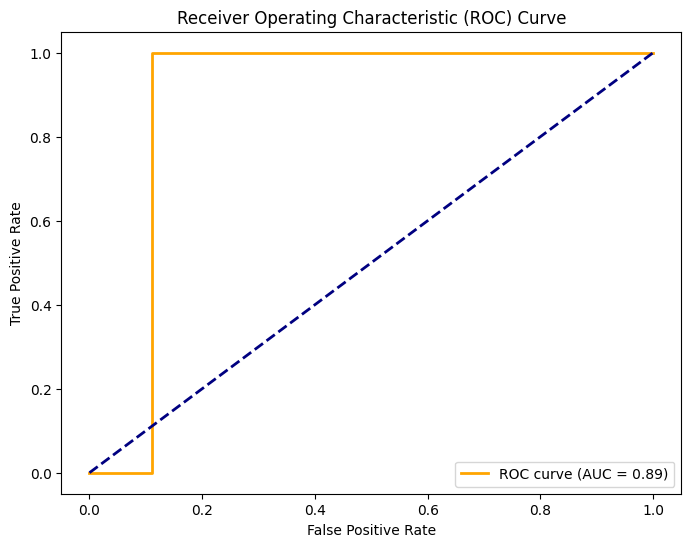

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Assuming ml1[0] contains probability predictions and y1[0] contains true labels
probabilities = np.array(ml1[1])
true_labels = y1[1]

# Calculate AUC
auc_score = roc_auc_score(true_labels, probabilities[:, 1])  # Assuming the second column is for positive class
print("AUC Score:", auc_score)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [63]:
for i in range(5):
    print(i)

0
1
2
3
4


In [60]:
ml1=prb1[16]
y1 =td2

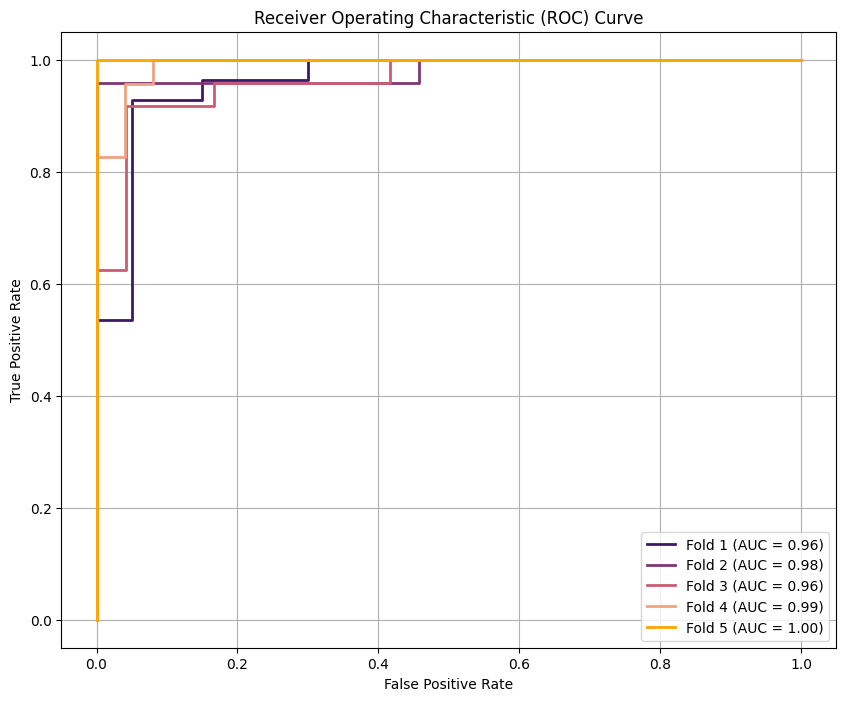

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
ml1=prb2[1]
y1 =td2
# Assuming ml1 is a list containing probability predictions for each fold
# and y1 is a list containing true labels for each fold

plt.figure(figsize=(10, 8), facecolor='w')  # Set facecolor to white

# Define a set of colors for each fold
colors = ['#3c1a64', '#803576', '#cc5c74', '#eda57f', 'orange']

for fold_num in range(5):
    probabilities = np.array(ml1[fold_num])
    true_labels = y1[fold_num]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each fold with a different color and style
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold_num + 1} (AUC = %0.2f)' % roc_auc, color=colors[fold_num], linestyle='-')

# Plot the diagonal line for reference

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('results_xgbBoost/auc_Lineardiscrimentmeta.pdf', bbox_inches='tight', dpi=4000)
plt.show()


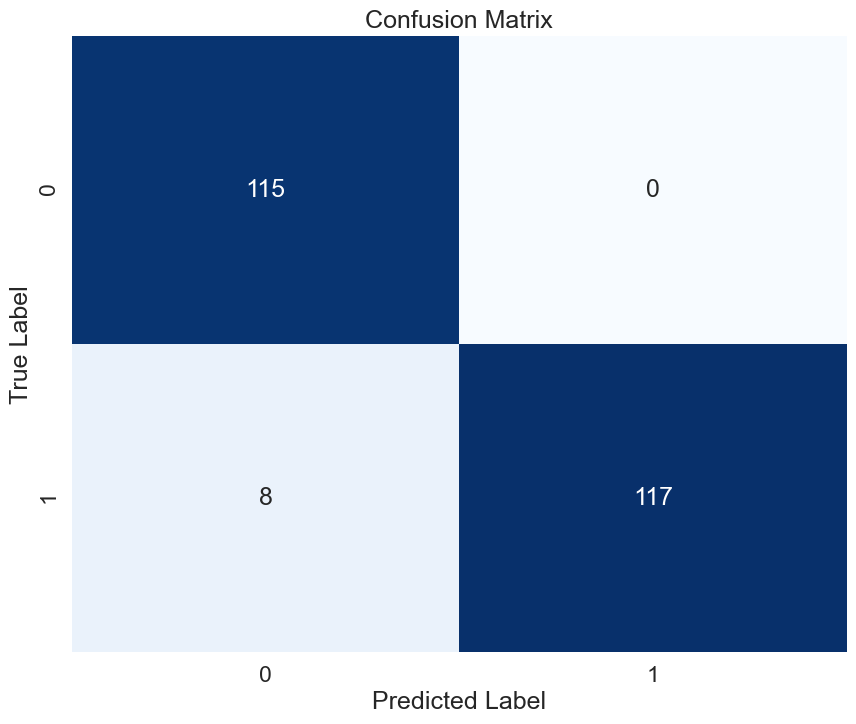

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming your confusion matrix is stored in the variable 'conf_matrix'
conf_matrix = [[115  , 0],
 [  8, 117]]
# Define class labels
class_labels = ['0', '1']

# Create a DataFrame from the confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Set font size
sns.set(font_scale=1.5)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save as PDF
plt.savefig('results_xgbBoost/confusion_matrix4_cLineardiscrimenmteta.pdf',dpi=4000,  format='pdf', bbox_inches='tight')

plt.show()


#parallel 